In [39]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import color
from skimage import io

In [40]:
kernelsize = 3

if kernelsize%2==1:
    ks=kernelsize
ksn=int((ks-1)/2)

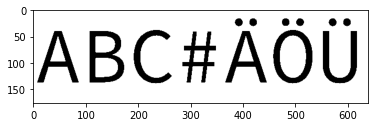

In [41]:
def neighbours(a,b,mat,s=ksn):
    neighbors = [mat[i][j] for i in range(a-s, a+s+1) for j in range(b-s, b+s+1)]
    return np.array(neighbors)

#Get RGB_Channels from 4 Channel png
imgi = io.imread('Test.png')[:,:,:3]

#convert to Binary
imgg = color.rgb2gray(imgi)
halfmax = np.max(imgg)/2
imgbw=np.where(imgg>halfmax, 255, 0)
plt.imshow(imgbw,cmap = "gray")

In [42]:
def mirror_padding(img,ksn):
    m2 = np.flipud(img)
    m2o = m2[-ksn:,:]
    m2u = m2[:ksn,:]
    m1 = np.fliplr(m2)
    m1ol=m1[-ksn:,-ksn:]
    m1ul=m1[:ksn,-ksn:]
    m1ur=m1[:ksn,:ksn]
    m1or=m1[-ksn:,:ksn]
    m3 = np.fliplr(img)
    m3l= m3[:,-ksn:]
    m3r= m3[:,:ksn]

    imgn=np.zeros((len(img)+2*ksn,len(img[0])+2*ksn))
    imgn[0:ksn,0:ksn]=m1ol
    imgn[ksn:-ksn,0:ksn]=m3l
    imgn[-ksn:,:ksn]=m1ul
    imgn[-ksn:,ksn:-ksn]=m2u
    imgn[-ksn:,-ksn:]=m1ur
    imgn[ksn:-ksn,-ksn:]=m3r
    imgn[0:ksn,-ksn:]=m1or
    imgn[0:ksn,ksn:-ksn]=m2o
    imgn[ksn:-ksn,ksn:-ksn]=img
    return imgn

img = mirror_padding(imgg,ksn)